In [9]:
using PortAudio, SampledSignals, LibSndFile

In [10]:
InputName = "Built-in Microphone"

"Built-in Microphone"

In [41]:
stream = PortAudioStream(InputName, 2, 0)

PortAudioStream{Float32}
  Samplerate: 48000.0Hz

  2 channel source: "Built-in Microphone"

In [12]:
duration = 10s

10 s

In [13]:
buf = read(stream, duration)

480000-frame, 2-channel SampleBuf{Float32, 2}
10.0s sampled at 48000.0Hz
▃▂▃▃▁▃▃▃▃▁▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▄▄▃▄▃▄▃▃▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▃▃▃▂▂▂▂▃▃▃▂▆▄▂▂▃▄▂▂▁
▃▂▃▃▁▃▃▃▃▁▃▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▃▃▃▄▄▃▄▃▄▃▃▄▃▃▃▃▃▃▃▃▃▃▃▂▂▂▃▃▃▂▂▂▂▃▃▃▂▆▄▂▂▃▄▂▂▁

In [36]:
lastwords = "ROSE BUD"
anybody = "Anybody there?"
hello = "Nice to meet you.";

In [15]:
run(`espeak $hello`)

Process(`espeak 'Nice to meet you.'`, ProcessExited(0))

In [16]:
buf = read(stream, 1s)

48000-frame, 2-channel SampleBuf{Float32, 2}
1.0s sampled at 48000.0Hz
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▃▄▃
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▃▄▃

In [17]:
close(stream)

In [29]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


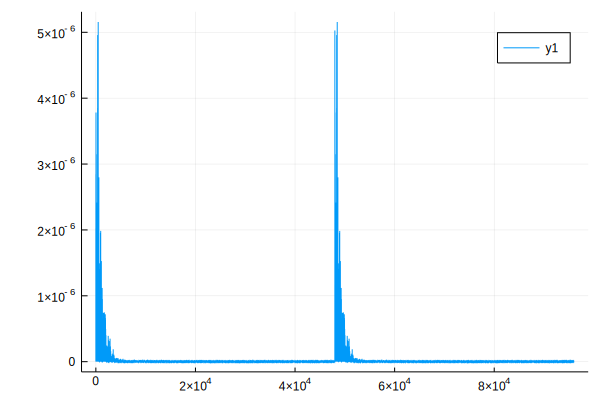

In [77]:
plot(square.(buf)[:10:length(buf)])

In [69]:
louderThanNoise(x) = x > 0.002

louderThanNoise (generic function with 1 method)

In [71]:
square(x) = x^2

square (generic function with 1 method)

In [59]:
stream = PortAudioStream(InputName, 2, 0)
buf = read(stream, 1s)
while(true)
    stream = PortAudioStream(InputName, 2, 0)
    buf = read(stream, 1s)
    if any(louderThanNoise, buf)
        run(`espeak $hello`)
        break
    else
        run(`espeak $anybody`)
    end
end

In [60]:
buf

48000-frame, 2-channel SampleBuf{Float32, 2}
1.0s sampled at 48000.0Hz
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁